# Módulo I - Aprendizado Supervisionado- Regressão

Neste notebook vamos conhecer mais sobre Regressão Linear Simples e Múltipla e Regressão Polimonial. 

Vamos utilizar a biblioteca *Scikit Learn* do Python para gerar os modelos regressivos. 

## Regressão Linear Simples

Regressão linear utiliza-se da relação entre duas variáveis para desenhar uma linha através deste. 

Se, de fato, houver uma relação de causa e efeito entres estes, pode-se utilizar a regressão linear para prever valores.

Segue exemplo de como calcular e plotar uma regressão linear:

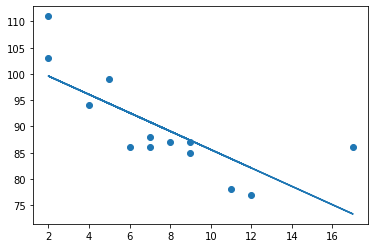

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

ageCar = [5,7,8,7,2,17,2,9,4,11,12,9,6]
maxSpeedCar = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(ageCar, maxSpeedCar)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, ageCar))

plt.scatter(ageCar, maxSpeedCar)
plt.plot(ageCar, mymodel)
plt.show()

Segue outro exemplo mais complexo:

f(x) = 103.11 + -1.7513X


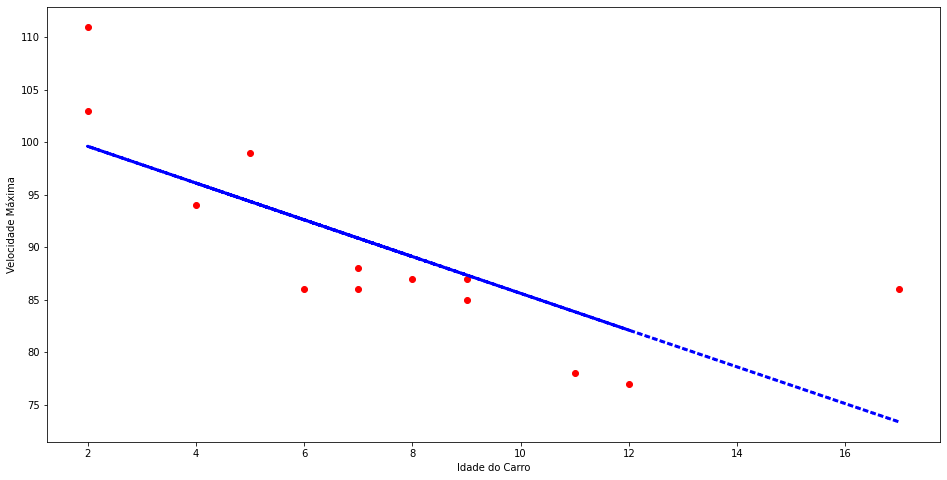

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     14.91
Date:                Fri, 09 Dec 2022   Prob (F-statistic):            0.00265
Time:                        00:59:36   Log-Likelihood:                -41.809
No. Observations:                  13   AIC:                             87.62
Df Residuals:                      11   BIC:                             88.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.1060      3.903     26.414      0.0

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [19]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import statsmodels.api as sm

ageCar = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
maxSpeedCar = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])

X = np.reshape(ageCar, (-1, 1))
y = np.reshape(maxSpeedCar, (-1, 1))

# Construir regressão linear
reg = LinearRegression()
reg.fit(X, y)

print("f(x) = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

# Plotar gráfico
f_previsaoes = reg.predict(X)
plt.figure(figsize = (16,8))
plt.scatter(
    ageCar, 
    maxSpeedCar, 
    c='red')

plt.plot(
    ageCar,
    f_previsaoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel("Idade do Carro")
plt.ylabel("Velocidade Máxima")
plt.show()

# Apresentar resumo
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

## Regressão Linear Múltipla

Podemos gerar uma regressão linear utilizando duas ou mais features. Segue exemplo:

In [26]:
arr1 = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
arr2 = np.array([75,80,65,90,101,76,66,77,80,76,120,120,73])

arr = np.concatenate((arr1, arr2))

In [52]:
from sklearn.linear_model import LinearRegression
import numpy as np

ageCar = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
hp = np.array([75,80,65,90,101,76,66,77,80,76,120,120,73])
maxSpeedCar = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])

Xs = np.array((ageCar, hp))
Xs = np.reshape(Xs, (-1, 2))
y = np.reshape(maxSpeedCar, (-1, 1))


# Construção do Modelo
modelo = LinearRegression()
modelo.fit(Xs, y)
print("f(x) = {:.5} + {:.5}*X1 + {:.5}*X2".format(modelo.intercept_[0], modelo.coef_[0][0], modelo.coef_[0][1]))

X2 = sm.add_constant(Xs)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

f(x) = 93.064 + -0.15728*X1 + 0.070198*X2
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     1.777
Date:                Fri, 09 Dec 2022   Prob (F-statistic):              0.219
Time:                        01:20:57   Log-Likelihood:                -45.401
No. Observations:                  13   AIC:                             96.80
Df Residuals:                      10   BIC:                             98.50
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Regressão Polinomial

Se seus pontos de dados não se ajustarem a uma regressão linear (uma linha reta através de todos os pontos de dados), pode ser ideal para regressão polinomial.

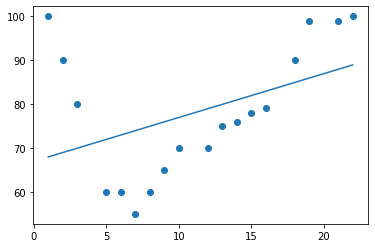

In [ ]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

A regressão polinomial, assim como a regressão linear, usa a relação entre as variáveis para encontrar a melhor maneira de traçar uma linha através dos pontos de dados.

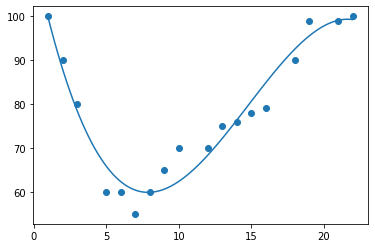

In [ ]:
import numpy

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

## Atividade Prática

Encontre alguma relação de causa e efeito no conjunto de dados "data.csv". Segue os comandos para carregar dentro do Python (utilizando Pandas):

In [53]:
import pandas
df = pandas.read_csv("https://www.w3schools.com/python/data.csv")
print(df.describe())
print(df)

            Volume       Weight         CO2
count    36.000000    36.000000   36.000000
mean   1611.111111  1292.277778  102.027778
std     388.975047   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  1117.250000   97.750000
50%    1600.000000  1329.000000   99.000000
75%    2000.000000  1418.250000  105.000000
max    2500.000000  1746.000000  120.000000
           Car       Model  Volume  Weight  CO2
0       Toyoty        Aygo    1000     790   99
1   Mitsubishi  Space Star    1200    1160   95
2        Skoda      Citigo    1000     929   95
3         Fiat         500     900     865   90
4         Mini      Cooper    1500    1140  105
5           VW         Up!    1000     929  105
6        Skoda       Fabia    1400    1109   90
7     Mercedes     A-Class    1500    1365   92
8         Ford      Fiesta    1500    1112   98
9         Audi          A1    1600    1150   99
10     Hyundai         I20    1100     980   99
11      Suzuki       Swift  

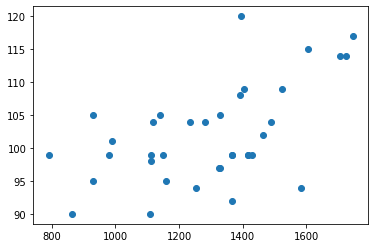

In [ ]:
x = df['Weight']
y = df['CO2']

plt.scatter(x, y)
plt.show()